### Name: Riad Mohammed
### Class: Machine Learning 
### Professor: Dr. Ryan White
### Due Date: April 30th 2023
###  Topic: Movie Recommendation System

## Problem Statement

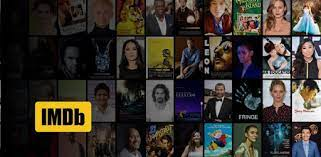

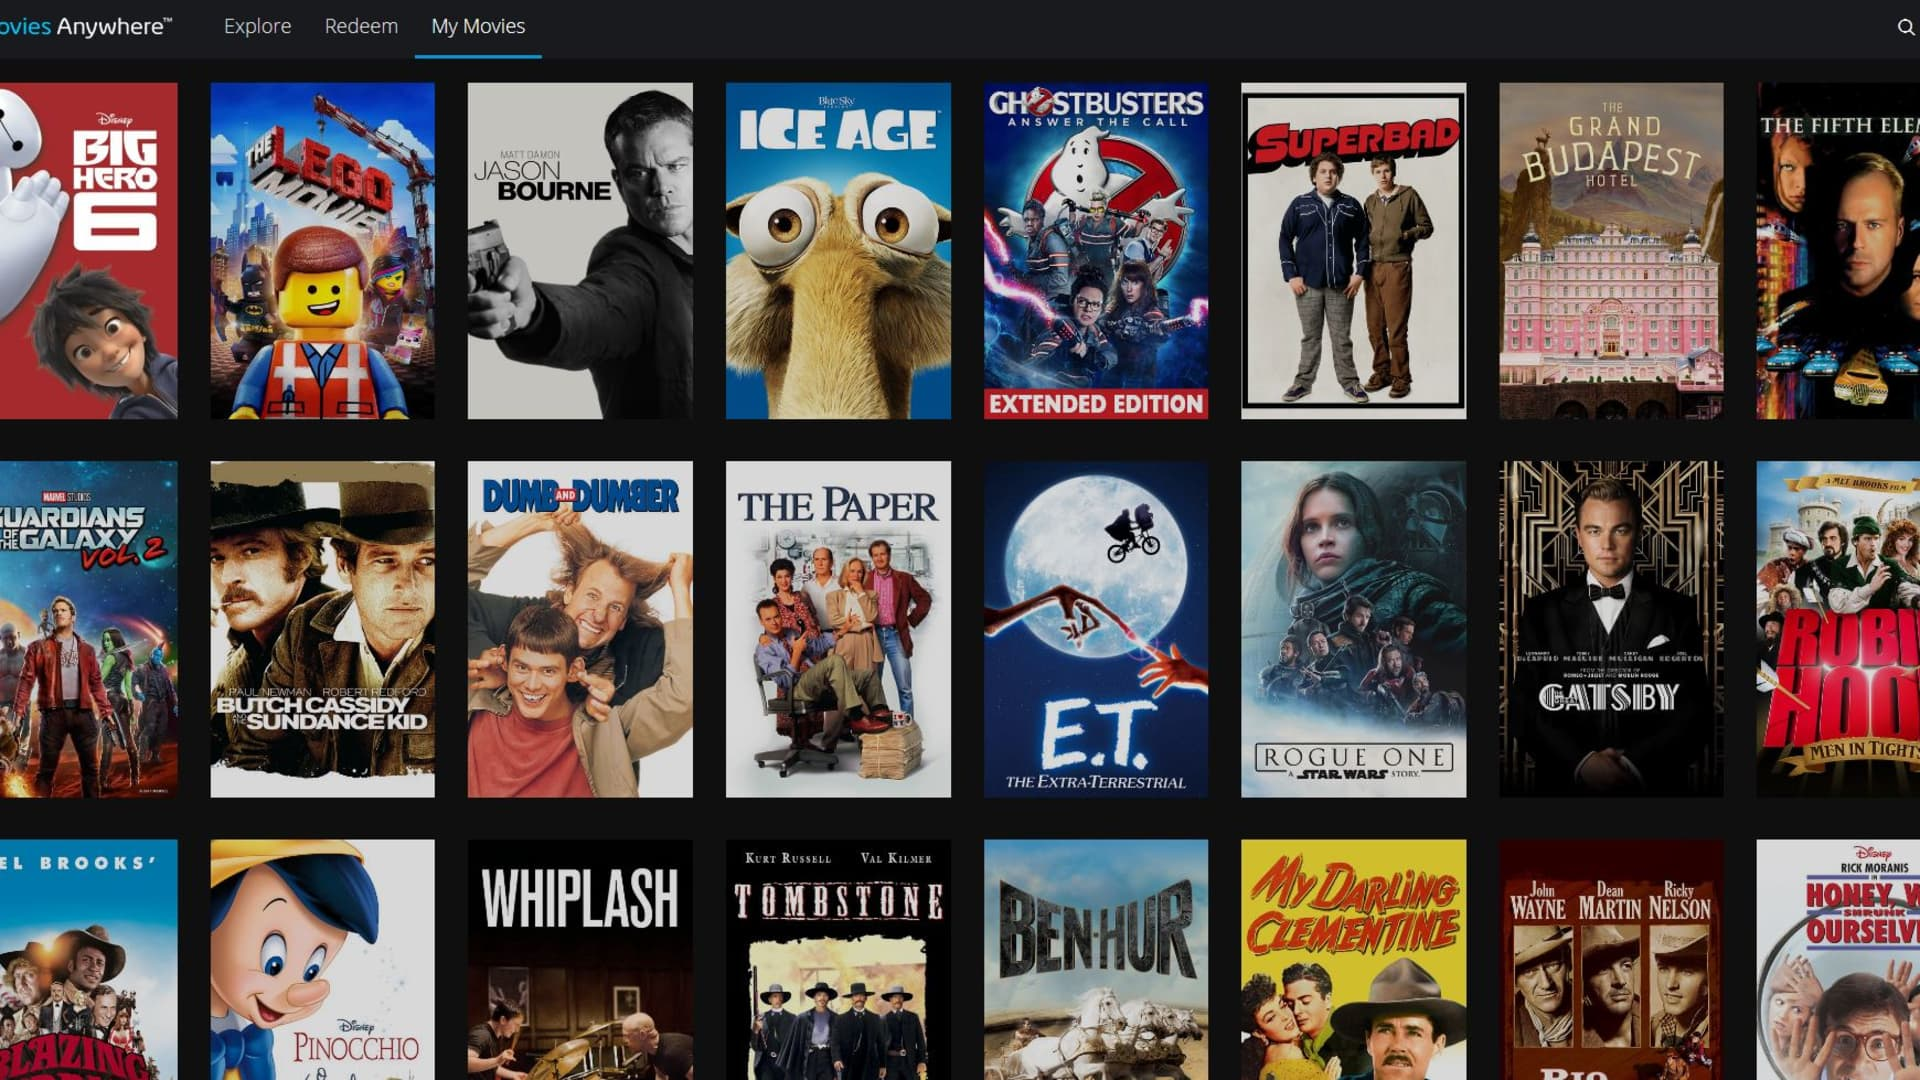

#### The entertainment industry is constantly evolving, and streaming services are continually facing the challenge of providing personalized recommendations to their users. Hence, this project aims to build a movie recommendation system using supervised and unsupervised learning methods to predict a user's rating for a given movie and make recommendations based on similar movie ratings and genres.

#### To achieve this, the IMDB Movies Dataset will be used as the primary data source. The data will be preprocessed, cleaned, and sorted to form an ideal dataset, which will be used to implement the desired model. The data will be analyzed to determine correlations such as ratings, genres, actors, and directors.

#### The supervised learning section of the project will involve developing an appropriate model, a linear regression-based model, to predict a user's rating for a given movie. The unsupervised learning component will use clustering,k-means clustering, to group similar movies together based on their features, aiding in an accurate prediction/recommendation to the user.

#### Overall, this project's relevance lies in its ability to leverage machine learning to enhance the user experience and drive engagement in the entertainment industry. By providing personalized and relevant movie recommendations to users, this project can address a real-world problem faced by movie and TV show streaming services

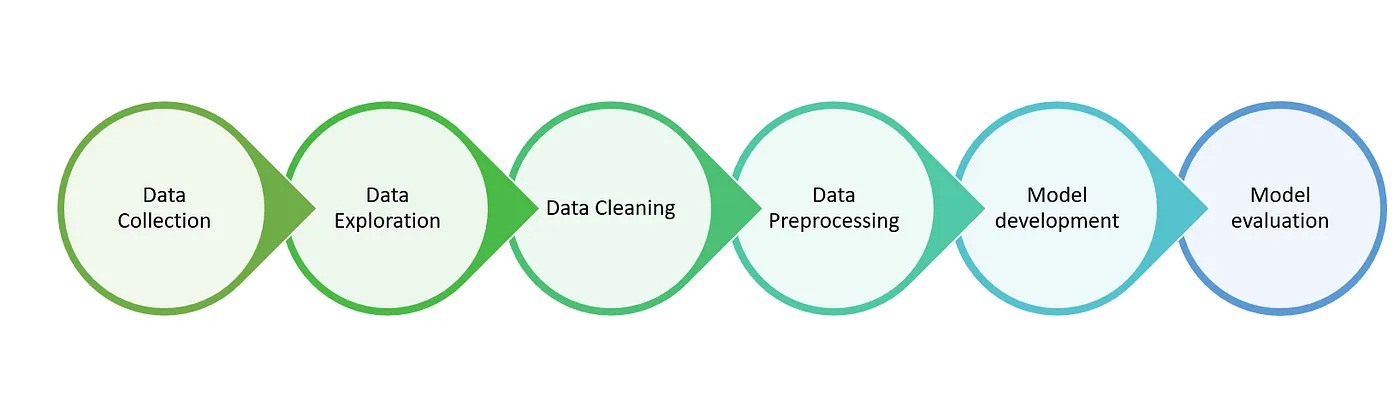

## Data Collection, Data Exploration, Data Cleaning and Data Preprocessing

In [1]:
#Reading in the movies dataset
import pandas as pd

movies_dataset = pd.read_csv("movies.csv")

In [2]:
movies_dataset

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [3]:
movies_dataset = movies_dataset.drop(['Poster_Link','Overview','Star1','Star2','Star3','Star4'],axis=1)

In [4]:
movies_dataset

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,26471,NaN


In [5]:
movies_dataset.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
No_of_Votes        int64
Gross             object
dtype: object

In [6]:
movies_dataset['Gross'] = movies_dataset['Gross'].str.replace(',', '')
#movies_dataset['Runtime'] = movies_dataset['Runtime'].str.replace('min', '')


In [7]:
movies_dataset['Runtime'] = movies_dataset['Runtime'].str.replace('min', '')

In [8]:
movies_dataset['Gross'] = movies_dataset['Gross'].fillna(0).astype(int)
movies_dataset['Runtime'] = movies_dataset['Runtime'].fillna(0).astype(int)

In [9]:
movies_dataset.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
No_of_Votes        int64
Gross              int32
dtype: object

In [10]:
#Convert into unique categorial values
movies_dataset["Released_Year"] = movies_dataset['Released_Year'].astype("category").cat.codes
movies_dataset["Certificate"] = movies_dataset['Certificate'].astype("category").cat.codes
movies_dataset["Director"] = movies_dataset['Director'].astype("category").cat.codes


In [11]:
movies_dataset

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,72,1,142,Drama,9.3,80.0,141,2343110,28341469
1,The Godfather,50,1,175,"Crime, Drama",9.2,100.0,137,1620367,134966411
2,The Dark Knight,86,14,152,"Action, Crime, Drama",9.0,84.0,83,2303232,534858444
3,The Godfather: Part II,52,1,202,"Crime, Drama",9.0,90.0,137,1129952,57300000
4,12 Angry Men,35,12,96,"Crime, Drama",9.0,96.0,456,689845,4360000
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,39,1,115,"Comedy, Drama, Romance",7.6,76.0,50,166544,0
996,Giant,34,3,201,"Drama, Western",7.6,84.0,164,34075,0
997,From Here to Eternity,31,7,118,"Drama, Romance, War",7.6,85.0,145,43374,30500000
998,Lifeboat,22,-1,97,"Drama, War",7.6,78.0,22,26471,0


In [12]:
movies_dataset.corr()['IMDB_Rating']

Released_Year   -0.132314
Certificate     -0.006085
Runtime          0.243096
IMDB_Rating      1.000000
Meta_score       0.268531
Director        -0.011944
No_of_Votes      0.494979
Gross            0.082381
Name: IMDB_Rating, dtype: float64

<AxesSubplot:>

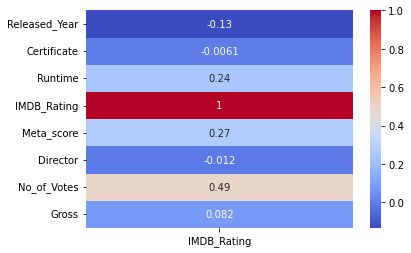

In [13]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = movies_dataset.corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix[["IMDB_Rating"]], annot=True, cmap="coolwarm")

<AxesSubplot:>

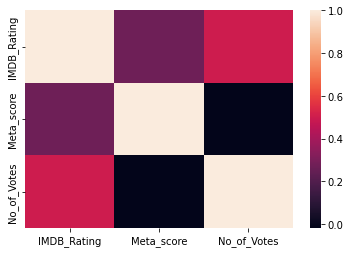

In [14]:
# select only the numeric columns
numeric_cols = movies_dataset.select_dtypes(include=['float64', 'int64']).columns

# create the correlation matrix with all valid elements
corr_matrix = movies_dataset[numeric_cols].corr(method='pearson', min_periods=1)

# print the correlation matrix
#print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix)

# Show the plot
#plt.show()

In [15]:
movies_dataset.dtypes

Series_Title      object
Released_Year       int8
Certificate         int8
Runtime            int32
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director           int16
No_of_Votes        int64
Gross              int32
dtype: object

In [16]:
# Drop all rows with null values in the "column_name" column
movies_dataset = movies_dataset.dropna(subset=["IMDB_Rating","Released_Year","Certificate","Runtime","Meta_score","Director","No_of_Votes","Gross"])

## Model Development and Model Evaluation

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = movies_dataset.drop("IMDB_Rating", axis=1) # X contains all features except the target
y = movies_dataset["IMDB_Rating"] # y contains only the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestRegressor(n_estimators=50, min_samples_split=10, random_state=1)
predictors = ["Released_Year","Certificate","Runtime","Meta_score","Director","No_of_Votes","Gross"]
rf.fit(X_train[predictors], y_train)
preds = rf.predict(X_test[predictors])
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
#combined = pd.DataFrame(dict(actual=y_test["IMDB_Rating"], prediction=preds), index=test.index)


# Store X_test and y_test in a dictionary
test_data = {"X_test": X_test, "y_test": y_test}


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#precision_score(X_test["IMDB_Rating"],preds)
print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.03639304550178308
R-squared score: 0.5670090874829214


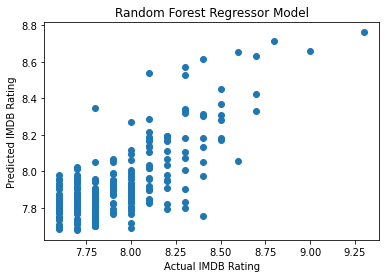

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds)
plt.xlabel("Actual IMDB Rating")
plt.ylabel("Predicted IMDB Rating")
plt.title("Random Forest Regressor Model")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into a 70/30 split
train_data, test_data = train_test_split(movies_dataset, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=50, min_samples_split=10, random_state=1)
predictors = ["Released_Year","Certificate","Runtime","Meta_score","Director","No_of_Votes","Gross"]
rf.fit(train_data[predictors], train_data["IMDB_Rating"])
preds = rf.predict(test_data[predictors])
combined = pd.DataFrame(dict(actual=test_data["IMDB_Rating"], prediction=preds), index=test_data.index)
# Calculate mean squared error
mse = mean_squared_error(test_data["IMDB_Rating"], preds)

In [21]:
print(mse)

0.036090130509150845


In [22]:
combined = combined.merge(movies_dataset[["Series_Title","Genre","Released_Year","Certificate","Runtime","Meta_score","Director","No_of_Votes","Gross"]], left_index=True, right_index=True)

In [23]:
combined

,actual,prediction,Series_Title,Genre,Released_Year,Certificate,Runtime,Meta_score,Director,No_of_Votes,Gross
627,7.8,7.844257,Hot Fuzz,"Action, Comedy, Mystery",85,14,121,81.0,119,463466,23637265
283,8.1,8.006798,Chinatown,"Drama, Mystery, Thriller",52,14,130,92.0,431,294230,29000000
766,7.7,7.694371,The Last King of Scotland,"Biography, Drama, History",84,8,123,74.0,278,175355,17605861
891,7.6,7.819234,Incredibles 2,"Animation, Action, Adventure",96,14,118,80.0,58,250057,608581744
68,8.4,8.027916,Oldeuboi,"Action, Drama, Mystery",81,1,101,77.0,73,515451,707481
...,...,...,...,...,...,...,...,...,...,...,...
743,7.7,7.904282,Midnight in Paris,"Comedy, Fantasy, Romance",89,6,96,81.0,532,388089,56816662
717,7.8,7.830150,Duck Soup,"Comedy, Musical, War",11,-1,69,93.0,290,55581,0
318,8.1,7.768489,The Circus,"Comedy, Romance",7,7,72,90.0,74,30205,0
375,8.0,7.920615,Mou gaan dou,"Action, Crime, Drama",80,14,101,75.0,28,117857,169659


In [24]:
new_movies = combined

In [25]:
new_movies = new_movies.drop(columns=["actual"])

In [26]:
new_movies

,prediction,Series_Title,Genre,Released_Year,Certificate,Runtime,Meta_score,Director,No_of_Votes,Gross
627,7.844257,Hot Fuzz,"Action, Comedy, Mystery",85,14,121,81.0,119,463466,23637265
283,8.006798,Chinatown,"Drama, Mystery, Thriller",52,14,130,92.0,431,294230,29000000
766,7.694371,The Last King of Scotland,"Biography, Drama, History",84,8,123,74.0,278,175355,17605861
891,7.819234,Incredibles 2,"Animation, Action, Adventure",96,14,118,80.0,58,250057,608581744
68,8.027916,Oldeuboi,"Action, Drama, Mystery",81,1,101,77.0,73,515451,707481
...,...,...,...,...,...,...,...,...,...,...
743,7.904282,Midnight in Paris,"Comedy, Fantasy, Romance",89,6,96,81.0,532,388089,56816662
717,7.830150,Duck Soup,"Comedy, Musical, War",11,-1,69,93.0,290,55581,0
318,7.768489,The Circus,"Comedy, Romance",7,7,72,90.0,74,30205,0
375,7.920615,Mou gaan dou,"Action, Crime, Drama",80,14,101,75.0,28,117857,169659


## Unsupervised Section

In [30]:
import numpy as np

features = ["prediction","Released_Year","Runtime","Meta_score","Director","No_of_Votes","Gross"]

In [31]:
data = new_movies[features].copy()

In [32]:
data.head()

,prediction,Released_Year,Runtime,Meta_score,Director,No_of_Votes,Gross
627,7.844257,85,121,81.0,119,463466,23637265
283,8.006798,52,130,92.0,431,294230,29000000
766,7.694371,84,123,74.0,278,175355,17605861
891,7.819234,96,118,80.0,58,250057,608581744
68,8.027916,81,101,77.0,73,515451,707481


## Scaling the data

In [48]:
#Scaling the data ensuring no one coloumn donates another in the clustering

data = ((data - data.min()) / (data.max() - data.min())) * 9 * + 1

In [49]:
data.head()

,prediction,Released_Year,Runtime,Meta_score,Director,No_of_Votes,Gross
627,1.313277,7.755319,3.391304,6.557143,1.955801,1.729136,0.247836
283,2.637984,4.595745,3.978261,7.971429,7.127072,1.060306,0.304064
766,0.091707,7.659574,3.521739,5.657143,4.591160,0.590505,0.184597
891,1.109340,8.808511,3.195652,6.428571,0.944751,0.885731,6.380951
68,2.810091,7.372340,2.086957,6.042857,1.193370,1.934584,0.007418


## Initializing random centroids

In [50]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [51]:
centroids = random_centroids(data,5)

In [52]:
centroids

,0,1,2,3,4
prediction,0.762077,4.506533,1.919787,1.531429,2.740931
Released_Year,7.372340,2.106383,6.989362,8.042553,7.946809
Runtime,1.760870,0.717391,3.456522,1.043478,3.391304
Meta_score,7.200000,2.442857,6.300000,6.557143,7.071429
Director,2.701657,5.651934,1.591160,7.657459,1.375691
No_of_Votes,2.161709,1.969299,1.302105,4.021287,1.329690
Gross,0.607484,0.792720,0.065088,1.242467,0.020969


## Label each data point based on how far from each centroid

In [53]:
## Calculating Eucl Dist
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [54]:
labels = get_labels(data,centroids)

In [55]:
labels.value_counts()

2    98
3    75
0    49
4    20
1    11
dtype: int64

## Update Centroids

In [58]:
#Looking and each movie and their label and then find the centre point of each cluster
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [59]:
from sklearn.decomposition import PCA #dim reduction
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [62]:
def plot_clusters(data, labels, centroids, iteration):
  
    pca = PCA(n_components=2) #transform into 2d
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

## Loop until centroids stop changing

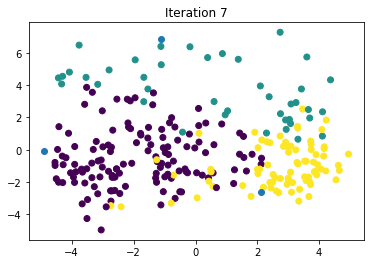

In [82]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [83]:
centroids

,0,1,2
prediction,0.000000,2.376575,1.529725
Released_Year,6.651471,0.000000,6.843786
Runtime,3.050333,0.000000,3.421966
Meta_score,6.114078,7.643183,0.000000
Director,0.000000,3.617417,6.961438
No_of_Votes,0.000000,0.289793,0.758259
Gross,0.000000,0.000000,0.000000


In [84]:
new_movies[labels ==2][['Series_Title','Genre'] + features].head()

,Series_Title,Genre,prediction,Released_Year,Runtime,Meta_score,Director,No_of_Votes,Gross
953,American Psycho,"Comedy, Crime, Drama",7.856940,78,101,64.0,315,490062,15070285
986,Watership Down,"Animation, Adventure, Drama",7.779978,56,91,64.0,312,33656,0
689,Kramer vs. Kramer,Drama,7.752037,57,105,77.0,416,133351,106260000
135,Klaus,"Animation, Adventure, Comedy",7.815805,97,96,65.0,450,104761,0
73,The Shining,"Drama, Horror",8.486250,58,146,66.0,463,898237,44017374


In [85]:
new_movies[labels ==0][['Series_Title','Genre'] + features].head()

,Series_Title,Genre,prediction,Released_Year,Runtime,Meta_score,Director,No_of_Votes,Gross
627,Hot Fuzz,"Action, Comedy, Mystery",7.844257,85,121,81.0,119,463466,23637265
766,The Last King of Scotland,"Biography, Drama, History",7.694371,84,123,74.0,278,175355,17605861
891,Incredibles 2,"Animation, Action, Adventure",7.819234,96,118,80.0,58,250057,608581744
68,Oldeuboi,"Action, Drama, Mystery",8.027916,81,101,77.0,73,515451,707481
339,Guardians of the Galaxy,"Action, Adventure, Comedy",8.048823,92,121,76.0,205,1043455,333176600


## Conclusion

## My model  predicted the user rating most likely for a particular movie based on pre selected features and a supervised  machine learning method. Futhermore, based on this most likely rating, movies were clustered and grouped together based on the same select features but used the new user rating from the supervised part. This last part serves as the recommendation system. It must be noted this model can be improved using more features, particularly the genre feature, to gain a more accurate model and recommendation system. However, unlike most recommendation system, what makes this model unique, is actually the lack of the usual genre usecase
